## importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import time


## Loading dataset

In [3]:
df = pd.read_csv(r"C:\Users\Ammar\Downloads\archive (8)\HousingData.csv")

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Data Overview

In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
cols_with_nan = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

for col in cols_with_nan:
    df[col] = df[col].fillna(df[col].mean())


In [11]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [12]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [13]:
df=df.astype(float)

In [14]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [15]:
X = df.drop('MEDV', axis=1)  
y = df['MEDV']


## Data Exploration and Visualization

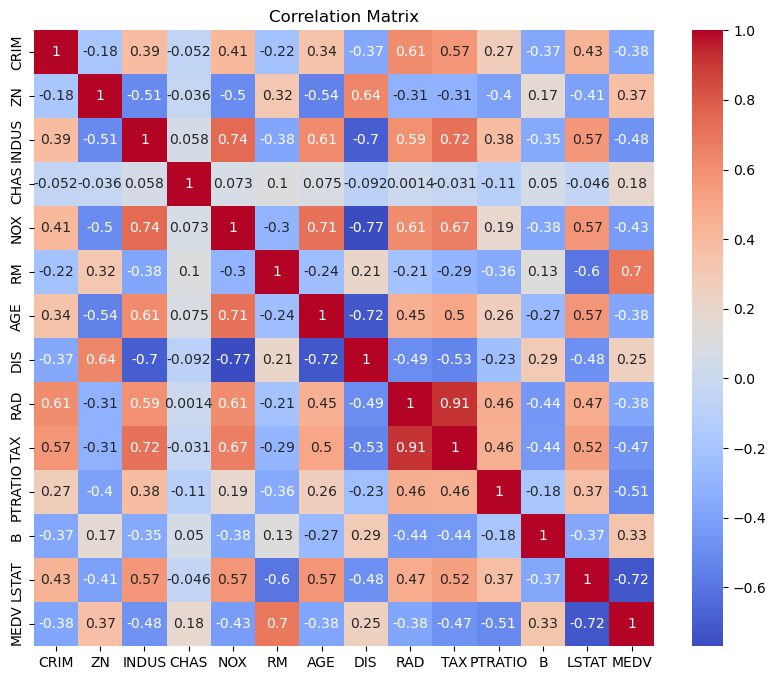

In [16]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


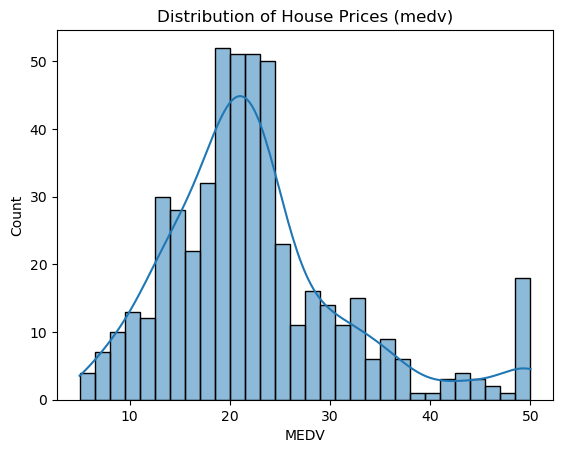

In [17]:
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title("Distribution of House Prices (medv)")
plt.show()


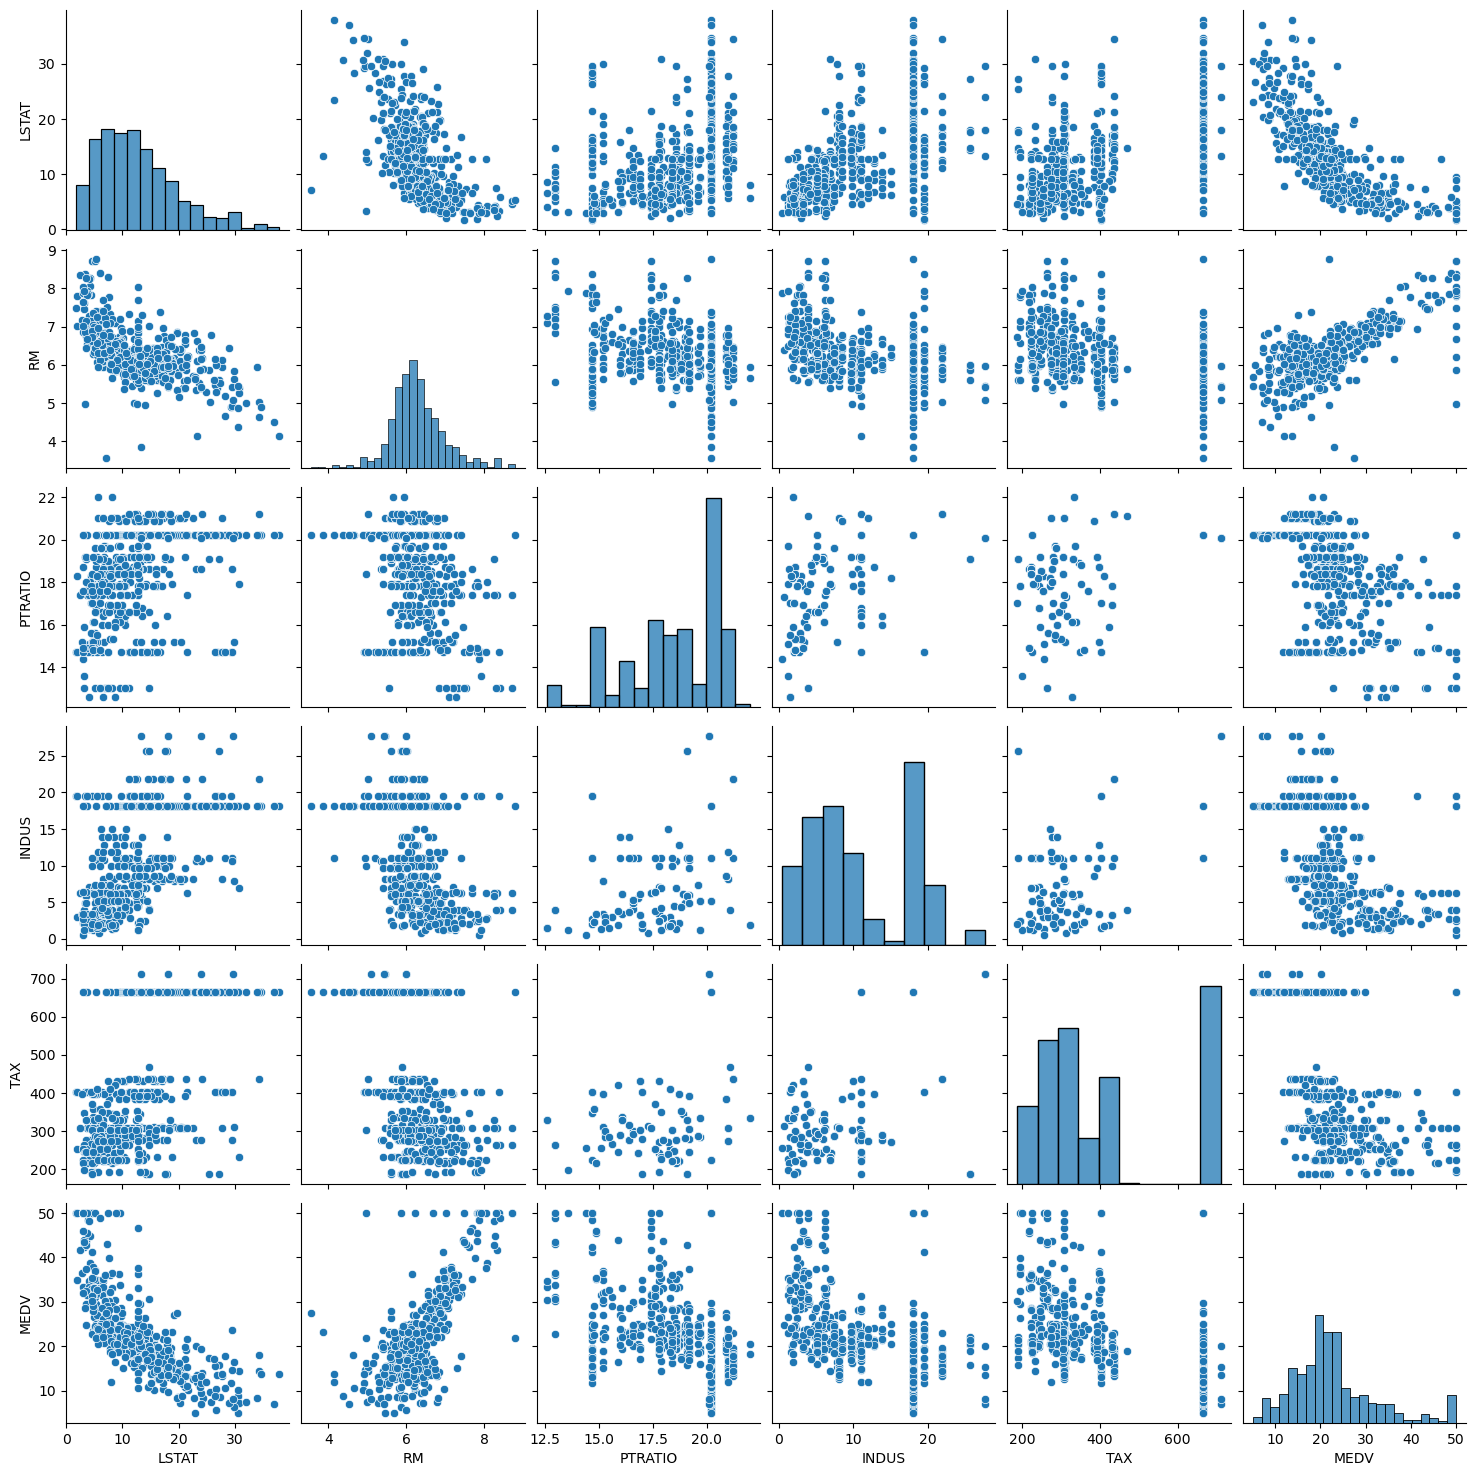

In [18]:
top_corr = corr['MEDV'].abs().sort_values(ascending=False)[1:6].index.tolist()
sns.pairplot(df[top_corr + ['MEDV']])


<Axes: >

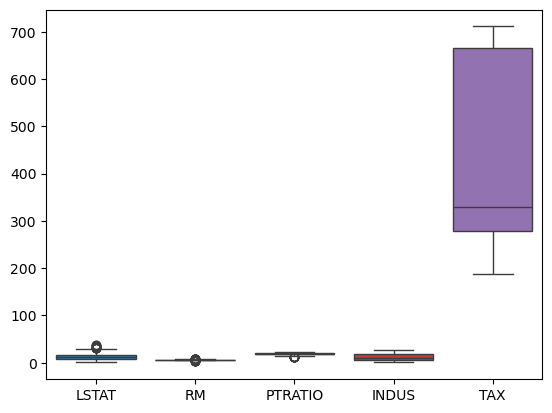

In [19]:
sns.boxplot(data=df[top_corr])


##  Feature Scaling 

In [20]:
from sklearn.preprocessing import StandardScaler

X = df.drop('MEDV', axis=1)
y = df['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## LinearRegression

In [33]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, method="normal", learning_rate=0.01, n_iters=1000):
        self.method = method
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        if self.method == "normal":
            X_b = np.c_[np.ones((n_samples, 1)), X]
            theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            self.bias = theta_best[0]
            self.weights = theta_best[1:]
        elif self.method == "gradient":
            self.weights = np.zeros(n_features)
            self.bias = 0
            for _ in range(self.n_iters):
                y_pred = np.dot(X, self.weights) + self.bias
                dw = (1/n_samples) * np.dot(X.T, y_pred - y)
                db = (1/n_samples) * np.sum(y_pred - y)
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


## Decision Tree Regressor 

In [34]:
class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(np.array(X), np.array(y))

    def _build_tree(self, X, y, depth=0):
        if len(y) < self.min_samples_split or depth >= self.max_depth:
            return np.mean(y)
        
        best_split = self._best_split(X, y)
        if not best_split:
            return np.mean(y)

        left_idx, right_idx = best_split['indices']
        left_subtree = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_subtree = self._build_tree(X[right_idx], y[right_idx], depth + 1)
        return {
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': left_subtree,
            'right': right_subtree
        }

    def _best_split(self, X, y):
        best_mse = float('inf')
        split_info = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left = np.where(X[:, feature] <= threshold)[0]
                right = np.where(X[:, feature] > threshold)[0]
                if len(left) == 0 or len(right) == 0:
                    continue
                mse = self._calculate_mse(y[left], y[right])
                if mse < best_mse:
                    best_mse = mse
                    split_info = {
                        'feature': feature,
                        'threshold': threshold,
                        'indices': (left, right)
                    }
        return split_info

    def _calculate_mse(self, y_left, y_right):
        left_error = np.var(y_left) * len(y_left)
        right_error = np.var(y_right) * len(y_right)
        return (left_error + right_error) / (len(y_left) + len(y_right))

    def _predict(self, x, node):
        if not isinstance(node, dict):
            return node
        if x[node['feature']] <= node['threshold']:
            return self._predict(x, node['left'])
        else:
            return self._predict(x, node['right'])

    def predict(self, X):
        return np.array([self._predict(row, self.tree) for row in np.array(X)])


## Decision Tree Regressor 

In [56]:
class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
        self.feature_importances_ = None  # ← Track feature importances

    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
            self.feature_index = feature_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        self.feature_importances_ = np.zeros(self.n_features_)
        self.root = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if (depth >= self.max_depth) or (n_samples < self.min_samples_split) or np.var(y) == 0:
            leaf_value = np.mean(y)
            return self.Node(value=leaf_value)

        best_feat, best_thresh, best_mse, best_splits = None, None, float("inf"), None

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_idx = X[:, feature_index] <= threshold
                right_idx = X[:, feature_index] > threshold
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue
                mse_left = np.var(y[left_idx]) * len(y[left_idx])
                mse_right = np.var(y[right_idx]) * len(y[right_idx])
                mse_total = (mse_left + mse_right) / n_samples

                if mse_total < best_mse:
                    best_feat = feature_index
                    best_thresh = threshold
                    best_mse = mse_total
                    best_splits = (left_idx, right_idx)

        if best_feat is None:
            return self.Node(value=np.mean(y))

        
        current_mse = np.var(y) * n_samples
        mse_gain = current_mse - best_mse
        self.feature_importances_[best_feat] += mse_gain

        left = self._grow_tree(X[best_splits[0]], y[best_splits[0]], depth + 1)
        right = self._grow_tree(X[best_splits[1]], y[best_splits[1]], depth + 1)
        return self.Node(feature_index=best_feat, threshold=best_thresh, left=left, right=right)

    def predict(self, X):
        return np.array([self._predict_input(x, self.root) for x in X])

    def _predict_input(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_input(x, node.left)
        else:
            return self._predict_input(x, node.right)


## XGBoost from Scratch

In [57]:
class XGBoostScratch:
    def __init__(self, n_estimators=50, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.feature_importances_ = None  # ✅ Add this line

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        y_pred = np.zeros_like(y)
        self.trees = []

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressorScratch(max_depth=self.max_depth)
            tree.fit(X, residuals)
            update = tree.predict(X)
            y_pred += self.learning_rate * update
            self.trees.append(tree)

        # ✅ Compute average feature importances from all trees
        self.feature_importances_ = np.mean(
            [tree.feature_importances_ for tree in self.trees],
            axis=0
        )

    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)
        return pred


In [58]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)


## Model Training 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Train and evaluate Linear Regression
lr = LinearRegressionScratch(method="normal")
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
print("Linear Regression - RMSE:", rmse(y_test, lr_preds), "R²:", r2(y_test, lr_preds))

# Train and evaluate Random Forest
rf = RandomForestRegressorScratch(n_estimators=10, max_depth=5)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)
print("Random Forest - RMSE:", rmse(y_test, rf_preds), "R²:", r2(y_test, rf_preds))

# Train and evaluate XGBoost
xgb = XGBoostScratch(n_estimators=50, learning_rate=0.1, max_depth=3)
xgb.fit(X_train_scaled, y_train)
xgb_preds = xgb.predict(X_test_scaled)


print("XGBoost - RMSE:", rmse(y_test, xgb_preds), "R²:", r2(y_test, xgb_preds))


Linear Regression - RMSE: 5.001766890194194 R²: 0.6588520195508113
Random Forest - RMSE: 3.7447760090202165 R²: 0.8087737090138195
XGBoost - RMSE: 2.774730321379298 R²: 0.895012530042944


## Model Performance Evaluation

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define R²
def r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Evaluate all models
print("Performance Comparison:")
print("Linear Regression -> RMSE:", rmse(y_test, lr_preds), " R²:", r2(y_test, lr_preds))
print("Random Forest     -> RMSE:", rmse(y_test, rf_preds), " R²:", r2(y_test, rf_preds))
print("XGBoost           -> RMSE:", rmse(y_test, xgb_preds), " R²:", r2(y_test, xgb_preds))


Performance Comparison:
Linear Regression -> RMSE: 5.001766890194194  R²: 0.6588520195508113
Random Forest     -> RMSE: 3.7086332424750945  R²: 0.8124471432610765
XGBoost           -> RMSE: 2.774730321379298  R²: 0.895012530042944


## Feature Importance Plots for Random Forest and XGBoost


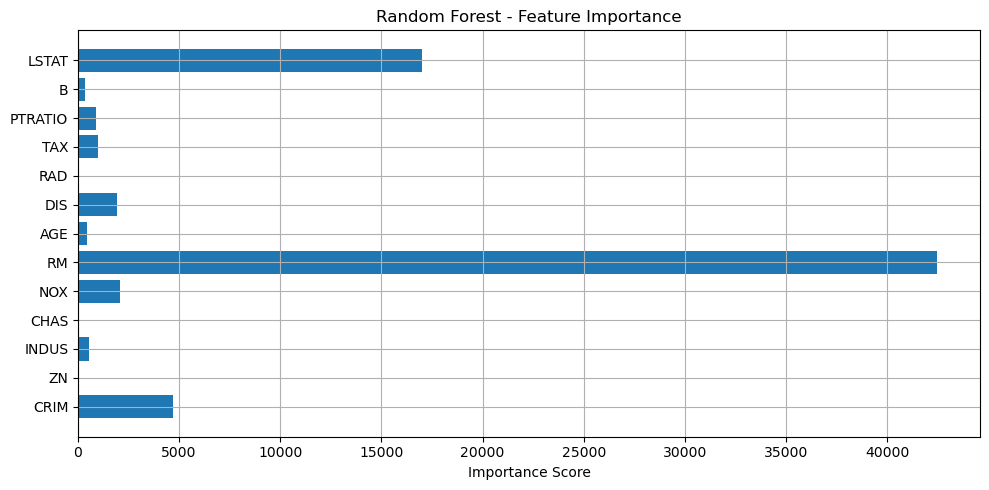

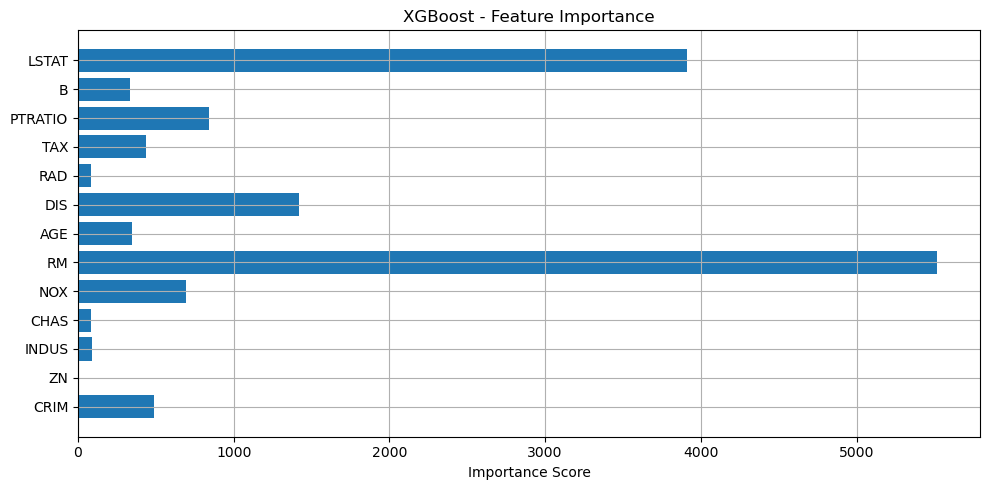

In [60]:
import matplotlib.pyplot as plt


feature_names = X.columns  

# Random Forest Feature Importance Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_names, rf.feature_importances_)
plt.xlabel("Importance Score")
plt.title("Random Forest - Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()

# XGBoost Feature Importance Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_names, xgb.feature_importances_)
plt.xlabel("Importance Score")
plt.title("XGBoost - Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Project Summary: Housing Price Prediction

This notebook presents a comprehensive approach to predicting housing prices using a machine learning pipeline. Below is a structured summary of the key stages covered in this project:

### 📁 Dataset and Libraries
- Imported essential libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and `sklearn`.
- Loaded and explored the dataset, focusing on understanding the features and target variable.

### 🧼 Data Preprocessing
- Handled missing values appropriately.
- Encoded categorical variables using suitable techniques.
- Performed feature scaling using `StandardScaler`.

### 📊 Exploratory Data Analysis (EDA)
- Used visual tools like histograms, boxplots, and correlation heatmaps to uncover data patterns and feature relationships.

### 📈 Model Development
- Split the data into training and testing sets.
- Built regression models using Scikit-learn (e.g., Linear Regression, etc.).
- Trained and tested the models while recording performance metrics like:
  - **Mean Squared Error (MSE)**
  - **R-squared Score (R²)**

### ⏱️ Performance Analysis
- Evaluated the time efficiency of the model training and prediction processes.
- Compared model performance on the basis of accuracy and computational cost.

### ✅ Conclusion
- Successfully built a predictive model capable of estimating housing prices.
- The pipeline includes data cleaning, visualization, feature engineering, and model evaluation.
- Further improvement can be achieved using advanced models (e.g., XGBoost, Random Forest) auning.

---

*End of Notebook*
